In [32]:
import matplotlib.pyplot as plt
import json
import numpy
import pandas as pd
import datetime

In [9]:
def plotGraph(y, time, action):
    userInput = ("Enter if you want to plot KeyUp or KeyDowns")
    data = y
    x = list(range(len(data)))

    # Average
    average = numpy.mean(data)
    # Words Per Minute = (Chr / 5) / Time
    wpm = 1000 * len(data) / time

    # MatPlotLib Handling
    plt.title("Time Elapsed Between "+action+" Events")
    plt.ylabel("Key Number")
    plt.ylabel("Milliseconds")
    plt.plot(x, y)
    # Format average display box
    plt.text(5, 35, ("WPM: ", wpm, "Average", average) ,style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
    plt.show()

In [81]:
def timeBetweenUPS(ksdf):
    action = 'Up'
    ups = list(ksdf[ksdf.action == action].time)
    time = ups[len(ups) - 1] - ups[0]
    time_between_ups = []
    while len(ups) > 1:
         #Get the time from the tuple
        startTime = ups.pop(0)
        betweenTime = ups[0] - startTime
        time_between_ups.append(betweenTime)
        #average = numpy.mean(time_between_downs)
    print(time_between_ups)
    plotGraph(time_between_ups, time, action)

In [82]:
def timeBetweenDOWNS(ksdf):
    action = 'Down'
    downs = list(ksdf[ksdf.action == action].time)
    time_between_downs = []
    time = downs[len(downs) - 1] - downs[0]
    while len(downs) > 1:
        startTime = downs.pop(0) #Get the time from the tuple
        betweenTime = downs[0] - startTime
        time_between_downs.append(betweenTime)
        #average = numpy.mean(time_between_downs)
    print(time_between_downs)
    plotGraph(time_between_downs, time, action)

In [83]:
def timeHoldingKey(ksdf):
    action = 'Hold'
    time_holding_key = []
    ups = list(ksdf[ksdf.action == 'Up'].time)
    downs = list(ksdf[ksdf.action == 'Down'].time)
    time = downs[len(downs) - 1] - downs[0]
    while len(downs) > 1:
        downTime = downs.pop(0)
        holdTime = ups.pop(0) - downTime
        time_holding_key.append(holdTime)
        #average = numpy.mean(time_between_downs)
    print(time_holding_key)
    plotGraph(time_holding_key, time, action)

In [87]:
def timeBetweenKey(ksdf):
    action = 'Between'
    time_between_key = []
    ups = list(ksdf[ksdf.action == 'Up'].time)
    downs = list(ksdf[ksdf.action == 'Down'].time)
    del downs[0]
    time = downs[len(downs) - 1] - downs[0]
    while len(ups) > 1:
        upTime = ups.pop(0)
        betweenTime = downs.pop(0) - upTime
        time_between_key.append(betweenTime)
        #average = numpy.mean(time_between_downs)
    print(time_between_key)
    plotGraph(time_between_key, time, action)

In [74]:
userdf = pd.read_csv('userdata.csv')
userdf#[userdf.username == 'd3'

,username,sn,phrase,date,key,action,time
0,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,D,Down,694791687
1,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,S,Down,694791765
2,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,D,Up,694791812
3,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,S,Up,694791859
4,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,L,Down,694791953
5,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,L,Up,694792046
6,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,H,Down,694792156
7,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,H,Up,694792250
8,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,B,Down,694792296
9,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,B,Up,694792406


In [51]:
# userdf = userdf.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [61]:
# userdf.drop(userdf[userdf.sn == 105].index, inplace=True)
# userdf.to_csv('userdata.csv', index=False)

   username   sn   phrase                        date key action       time
14   george  1.0  dslhbyj  2018-06-03 12:58:51.220012   D   Down  694793250
15   george  1.0  dslhbyj  2018-06-03 12:58:51.220012   S   Down  694793328
16   george  1.0  dslhbyj  2018-06-03 12:58:51.220012   D     Up  694793375
17   george  1.0  dslhbyj  2018-06-03 12:58:51.220012   S     Up  694793437
18   george  1.0  dslhbyj  2018-06-03 12:58:51.220012   L   Down  694793578
19   george  1.0  dslhbyj  2018-06-03 12:58:51.220012   L     Up  694793656
20   george  1.0  dslhbyj  2018-06-03 12:58:51.220012   H   Down  694793765
21   george  1.0  dslhbyj  2018-06-03 12:58:51.220012   H     Up  694793843
22   george  1.0  dslhbyj  2018-06-03 12:58:51.220012   B   Down  694793906
23   george  1.0  dslhbyj  2018-06-03 12:58:51.220012   B     Up  694794000
24   george  1.0  dslhbyj  2018-06-03 12:58:51.220012   Y   Down  694794046
25   george  1.0  dslhbyj  2018-06-03 12:58:51.220012   Y     Up  694794140
26   george 

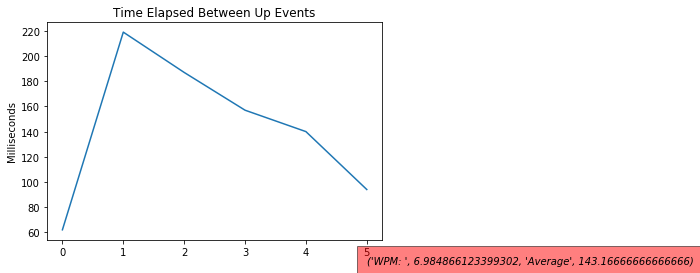

[78, 250, 187, 141, 140, 110]


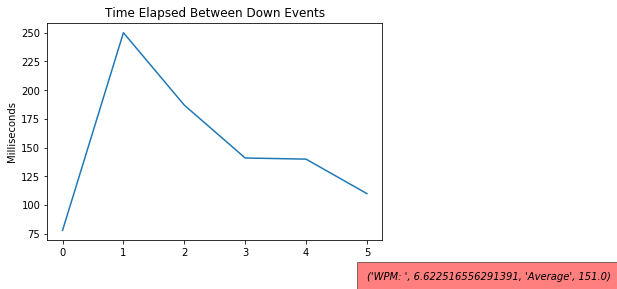

[125, 109, 78, 78, 94, 94]


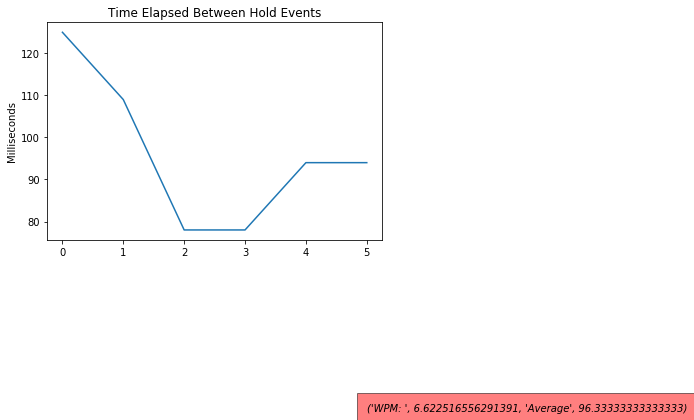

[-47, 141, 109, 63, 46, 16]


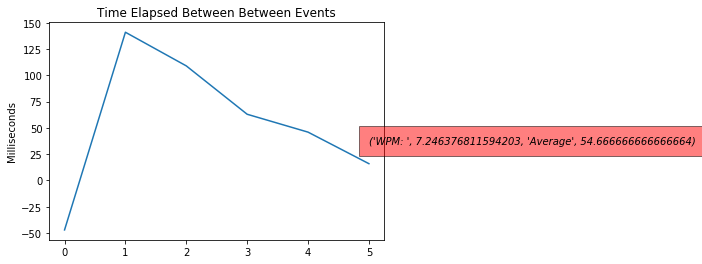

In [89]:
sn = 1
username = 'george'
print(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenUPS(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenDOWNS(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeHoldingKey(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenKey(userdf[(userdf.sn == sn) & (userdf.username == username)])